# Análise de Mudanças Cimáticas

O <a href="https://data.giss.nasa.gov/gistemp/graphs_v3/">melhor conjunto de dados</a> de dados que encontrei na internet está hospedado na NASA.

In [1]:
# importar pacotes necessários
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

### Importando dados para o Notebook

Usando a função loadtxt do NumPy para carregar os dados. Os dados agora estão na memória e podem ser usados pelo aplicativo.

In [2]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

## Criando um gráfico de dispersão

O conjunto de dados importado usa uma média de 30 anos, entre 1951 e 1980, para calcular um clima base para esse período e, em seguida, usa médias climáticas de 5 anos para calcular a diferença entre a média de 5 anos e a média de 30 anos de cada ano. O gráfico de dispersão mostra as diferenças climáticas anuais.

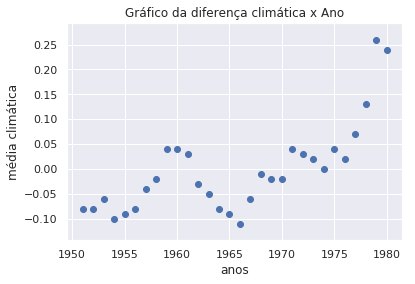

In [18]:
plt.scatter(yearsBase, meanBase)
plt.title('Gráfico da diferença climática x Ano')
plt.xlabel('anos', fontsize=12)
plt.ylabel('média climática', fontsize=12)
plt.show()

<i>Gráfico de dispersão produzido pelo Matplotlib</i>

## Executando a regressão linear

Em estatística ou econometria, regressão linear é uma <b>equação</b> para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. A regressão, em geral, tem como objetivo tratar de um valor que não se consegue estimar inicialmente. 

Na linha de regressão, você pode ver que a diferença entre as médicas climáticas entre 30 anos e as médias climáticas de 5 anos aumentando ao longo do tempo. A maior parte do esforço computacional necessário para gerar a linha de regressão foi feito pela função <b>polyfit</b> no NumPy, o qual calculou os valores <i>m</i> e <i>b</i> na equação <i>y = mx + b</i>.

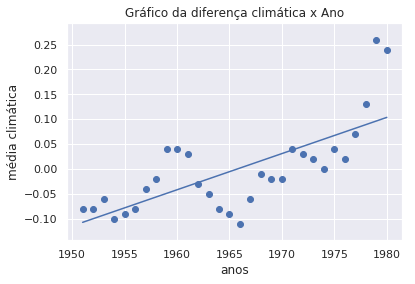

 y = 0.007279199110122221 * x + -14.309265850945222


In [17]:
# Criando uma regressão linear a partir dos pontos de dados
m,b = np.polyfit(yearsBase, meanBase, 1)

# Uma função simples y = mx + b
def f(x):
    return m*x + b

# Isso gera o mesmo gráfico de dispersão de antes, mas adiciona um gráfico de linha usando a função acima
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('Gráfico da diferença climática x Ano')
plt.xlabel('anos', fontsize=12)
plt.ylabel('média climática', fontsize=12)
plt.show()

# Imprime texto na tela mostrando os valores computados de m e b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

<i>Gráfico de dispersão com linha de regressão</i>

### Executando a regressão linear com o Scikit-learn

#### Você conseguiu enxergar alguma diferença no gráfico? 
A saída é quase idêntica a da outra regressão. A diferença é que o Scikit-learn fez a maior parte do trabalho. Se você não conseguiu enxergar eu vou te explicar: eu não precisei codificar uma função de linha como eu fiz no NumPy; a função <i>LinearRegression</i> do Scikit-learn fez isso por mim. 

O Scikit-learn é compatível com muitos diferentes tipos de regressão que são úteis na criação de modelos de machine learning sofisticados.

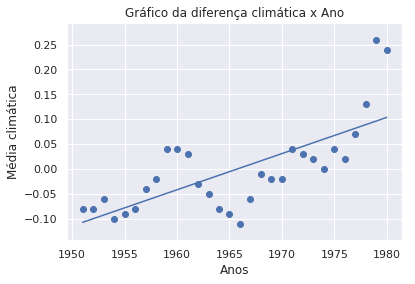

 y = 0.007279199110122357 * x + -14.309265850945492


In [16]:
# Escolhendo o modelo de regressão linear e instanciando
model = LinearRegression(fit_intercept=True)

#Construindo o modelo
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Gerando um enredo como o anterior
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('Gráfico da diferença climática x Ano')
plt.xlabel('anos', fontsize=12)
plt.ylabel('média climática', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

<i>Gráfico de dispersão com linha de regressão calculada pelo Scikit-learn</i>

## Analisando dados com o Seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


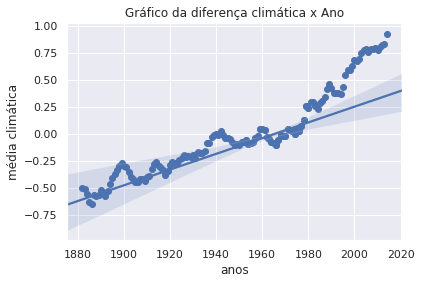

In [19]:
plt.scatter(years, mean)
plt.title('Gráfico da diferença climática x Ano')
plt.xlabel('anos', fontsize=12)
plt.ylabel('média climática', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

<i>Comparação dos valores reais e previstos gerados com o Seaborn</i>

Pode-se perceber como os pontos de dados dos primeiros 100 anos estão em conformidade com os valores previstos, ao contrário dos pontos de dados de aproximadamente 1980 em diante. São modelos como esses que levam à confirmação de que as mudanças climáticas estão sendo drasticamente aceleradas.